# CS610 Assignment 1

***Requirement on Submission***

1.	Submit ONLY your Jupyter Notebook. 
Do not submit the given dataset.
Do not zip your Jupyter Notebook. 
Your answers to all questions should be in your Jupyter Notebook.

2.	Organize your code so that it clearly shows your intention and logic. 
To organize your code, you can either:
a.	Add comments in your code, or 
b.	Add a mark-up cell to explain what you want to do in the following code cell
You can use a mix of the above two throughout your Jupyter Notebook. No need to consistently use one way.

3.	Make sure your code can run without any adjustment on grader’s machine. 
Adjust your answer before submission if you run your code on Google Colab and use any cloud drive. 
Note: the dataset is supposed to be unzipped and put in the same directory with your Jupyter Notebook.
Note: you can assume grader’s machine has installed the packages you use in your code.

4.	Other than your code, create a concluding section under your answer to each question. Tabulate your numbers when a table is provided for you to fill in.

5.	Limit your lines of code in a single code cell: no more than 50 lines, including comments.

6.  You are NOT allowed to use LLMs to answer any questions here. 	

***Failure to meet the requirements above will cause deduction in your grade.***

## Introduction

This assignment uses a small subset of the [yelp dataset] (https://www.yelp.com/dataset).

**Description of the data:**

- **`yelp_2004.csv`** contains the dataset. 
- Each observation (row) in this dataset is a review of a particular business by a particular user.
- The **stars** column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars are better.) In other words, it is the rating of the business by the person who wrote the review.
- The **text** column is the text of the review.

**Goal:** Predict the star rating of a review using **only** the review text.

Use **random_state=2024** wherever applicable.

In [2]:
# import the libraries and load the dataset
import pandas as pd
# import the rest of the libraies/packages

df = pd.read_csv('yelp_2004.csv')
df.shape

(21000, 2)

## Task 1: Data Exploration (6 points)
Explore the dataset and generate the word cloud for reviews with `stars=1` and `stars=5`, respectively. Check the [word_cloud](https://github.com/amueller/word_cloud) library. (4 points)

An example of word cloud is showed below. 

![word cloud](https://static.commonlounge.com/fp/600w/FxEgN5woHmXOJOLtm7oGGenV81520493685_kc)

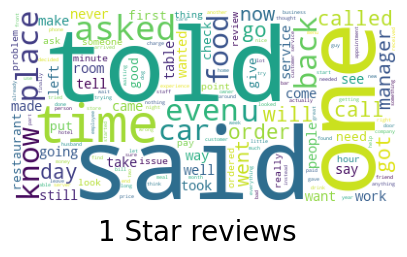

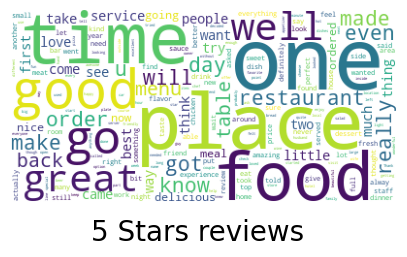

In [426]:
# Importing libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stop_words = set(STOPWORDS)

# Function to create a wordcloud from a text
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words
    ).generate(str(data))

    fig = plt.figure(1, figsize=(5, 5))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.loc[df.stars==1,'text'].str.cat(sep='\n'), title = "1 Star reviews")
show_wordcloud(df.loc[df.stars==5,'text'].str.cat(sep='\n'), title = "5 Stars reviews")

What do you observe? Does the generated word cloud match your expectation? Elaborate. (2 points)

The word cloud for both review types had some similar words found such as 'food'. The word cloud for the 5 stars review was more reflective of its rating as words like 'good', 'great', and 'delicious' were found. Conversely, the 1 star review word cloud did not display many words of negative sentiments and verbs like 'asked' and 'said' were more prominent. 
The generated word cloud for the 5 stars review matched my expectation but the word cloud of the 1 star review did not. I expected words that have more negative sentiments to appear in the 1 star review word cloud to reflect the poor ratings. 

## Task 2: Linear Regression (24 points)

In this task, you are to build a linear regression model to predict the stars based solely on the text feature. You need to follow the below steps.
1. Split the data into train (80%) and test (20%) using random_state = 2024
2. Use [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to generate a vector representation of the text. Use ngram_range = (1, 2) and min_df=10
3. Build a linear regression model using the default parameters. 


1. Importing libraries and splitting data to train and test

In [4]:
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn import metrics
import numpy as np

# Assiging the x and y variables
x=df['text']
y=df['stars']

# Split data to train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=2024)

2. Vectorize and transform data using countvectorizer

In [5]:
vectorizer = CountVectorizer(ngram_range=(1,2),min_df=10)

X_train_trf = vectorizer.fit_transform(X_train)

X_test_trf = vectorizer.transform(X_test)

print(X_train_trf.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
# Obtaining the vectorized features
vectorizer.get_feature_names_out()

array(['00', '00 00', '00 am', ..., 'zucchini and', 'zumba', 'étouffée'],
      dtype=object)

3. Building logistic regression model based on vectorized data and obtaining RMSE

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X_train_trf,y_train)
print('Train RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_train, regr.predict(X_train_trf))), 4))

y_pred = regr.predict(X_test_trf)
print('Test RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))

Train RMSE: 0.0077
Test RMSE: 0.9529


Explain how CountVectorizer works based on the documentation from scikit-learn.org. (2 points)

Countvectorizer is a method to convert a collection of text documents to a matrix of token counts. Each word is a token and the occurence frequency of each token is 
transformed into a matrix, where each column represents the token and each row is a review.

Explain what do `ngram_range` and `min_df` mean? (2 points)

ngram_range is the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. n-gram is the number of words in a feature, for example, 1-grams (unigrams) represents indivdual words and 2-grams (bigrams) represents a set of 2 words. 
min_df is the threshold for the minimum frequency of a word when building a vocabulary from a document.

What is the RMSE score on the train and test dataset, respectively? What do you observe? (3 points)

Train RMSE: 0.0077
Test RMSE: 0.9529
The RMSE for the test dataset is much higher in comparison to the train dataset. 

List the 10 most important features based on the magnitude of the coefficients. Do these attributes make sense? (3 points) 

Hint 
1. check the documentation of linear regression on how to get the model coefficients. 
2. It's easier to generate a dataframe with feature names and their corresponding coefficients.

In [7]:
coef_df=pd.DataFrame({'Feature':vectorizer.get_feature_names_out(),'Coefficient':regr.coef_,'Absolute Coefficient':abs(regr.coef_)})

# Generating top 10 most important features based on absolute values of coefficient
coef_df.sort_values('Absolute Coefficient',ascending=False).head(10)

,Feature,Coefficient,Absolute Coefficient
77650,right no,-0.456190,0.456190
62541,now know,0.300315,0.300315
95428,them keep,-0.286848,0.286848
83029,site but,-0.284906,0.284906
56824,might help,-0.269198,0.269198
53243,local shop,-0.256856,0.256856
16472,business they,-0.234967,0.234967
77653,right now,0.224361,0.224361
40945,has great,-0.214190,0.214190
112239,working at,-0.212014,0.212014


Build 4 Lasso regression models with alpha in [0.0001, 0.001, 0.01, 0.1] and create a table with the below schema. Think about what is model complexity here. Comment on the observations.(4 points)

| alpha  | Training_RMSE | Model Complexity | Test RMSE |
|--------|---------------|------------------|-----------|
| 0.0001 |               |                  |           |
| 0.001  |               |                  |           |
| 0.01   |               |                  |           |
| 0.1    |               |                  |           |

In [ ]:
# Creating dictionary to store column values
lasso_dict={"alpha":[],"Training_RMSE":[],"Model Complexity":[],"Test RMSE":[]}

# Using for loop to test
for a in [0.0001,0.001,0.01,0.1]:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train_trf,y_train)
    lasso_dict["alpha"].append(a)
    lasso_dict["Training_RMSE"].append(round(np.sqrt(metrics.mean_squared_error(y_train,lasso.predict(X_train_trf))),4))
    lasso_dict["Model Complexity"].append(np.linalg.norm(lasso.coef_,ord=1))
    lasso_dict["Test RMSE"].append(round(np.sqrt(metrics.mean_squared_error(y_test,lasso.predict(X_test_trf))),4))

lasso_table=pd.DataFrame(lasso_dict)

c:\Users\liu_y\anaconda3\envs\CS610-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1185.6054173171576, tolerance: 4.236702833333335
  model = cd_fast.sparse_enet_coordinate_descent(


In [8]:
# Printing the table
lasso_table

,alpha,Training_RMSE,Model Complexity,Test RMSE
0,0.0001,0.1644,693.215272,1.0392
1,0.0010,0.6620,95.273417,0.8604
2,0.0100,0.9127,9.724364,0.9405
3,0.1000,1.1385,1.512181,1.1533


List the 10 most important features based on the magnitude of the coefficients of the best performing model (think about what metric should we use to decide on the best model). Do we have a better list of features now? (3 points)

In [8]:
# Getting the top 10 most important features
lasso_impt=linear_model.Lasso(alpha=0.01)
lasso_impt.fit(X_train_trf,y_train)
lasso_impt_df=pd.DataFrame({'Feature':vectorizer.get_feature_names_out(),'Coefficient':lasso_impt.coef_,'Absolute Coefficient':abs(lasso_impt.coef_)})
lasso_impt_df.sort_values('Absolute Coefficient', ascending=False).head(10)

,Feature,Coefficient,Absolute Coefficient
112379,worst,-0.214283,0.214283
4060,amazing,0.153177,0.153177
70390,perfect,0.151784,0.151784
14732,bland,-0.125607,0.125607
24871,delicious,0.125510,0.125510
43970,horrible,-0.125262,0.125262
89681,terrible,-0.120103,0.120103
10934,awesome,0.115645,0.115645
72219,poor,-0.111723,0.111723
91235,the best,0.108822,0.108822


Comparing between the RMSE for different alpha values, alpha = 0.01 gave better training and test RMSE with reasonable model complexity. Based on the generated list of features, it was comparably better than the previous list of features as it can be considered more informative description of the sentiments.

Buld 4 Ridge regression models with alpha in [0.1, 1, 10, 100, 500, 1000] and create a table with the below schema. Think about what is model complexity here. Comment on the observations.(4 points)

| alpha  | Training_RMSE | Model Complexity | Test RMSE |
|--------|---------------|------------------|-----------|
| 0.1 |               |                  |           |
| 1  |               |                  |           |
| 10   |               |                  |           |
| 100    |               |                  |           |
| 500    |               |                  |           |
| 1000    |               |                  |           |

In [12]:
ridge_dict={"alpha":[],"Training_RMSE":[],"Model Complexity":[],"Test RMSE":[]}
for a in [0.1,1,10,100,500,1000]:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train_trf,y_train)
    ridge_dict["alpha"].append(a)
    ridge_dict["Training_RMSE"].append(round(np.sqrt(metrics.mean_squared_error(y_train,ridge.predict(X_train_trf))),4))
    ridge_dict["Model Complexity"].append(np.linalg.norm(ridge.coef_,ord=2))
    ridge_dict["Test RMSE"].append(round(np.sqrt(metrics.mean_squared_error(y_test,ridge.predict(X_test_trf))),4))

ridge_table=pd.DataFrame(ridge_dict)

In [13]:
ridge_table

,alpha,Training_RMSE,Model Complexity,Test RMSE
0,0.1,0.0077,6.332708,0.9523
1,1.0,0.0093,6.260306,0.9490
2,10.0,0.0363,5.922860,0.9366
3,100.0,0.2158,4.286655,0.8861
4,500.0,0.4686,2.366523,0.8464
5,1000.0,0.5760,1.702289,0.8440


The model complexity and training RMSE is observed to decrease with increasing alpha values. However, the test RMSE is decreasing. This could likely be attributed to overfitting of the model to the training dataset, resulting in poor performance on the test data.

List the 10 most important features based on the magnitude of the coefficients of the best performing model (think about what metric should we use to decide on the best model). Do the top features make sense? (3 points)

In [14]:
ridge_impt=linear_model.Ridge(alpha=1000)
ridge_impt.fit(X_train_trf,y_train)
ridge_impt_df=pd.DataFrame({'Feature':vectorizer.get_feature_names_out(),'Coefficient':ridge_impt.coef_,'Absolute Coefficient':abs(ridge_impt.coef_)})
ridge_impt_df.sort_values('Absolute Coefficient', ascending=False).head(10)

,Feature,Coefficient,Absolute Coefficient
112379,worst,-0.098733,0.098733
4060,amazing,0.086993,0.086993
89681,terrible,-0.077308,0.077308
10934,awesome,0.076688,0.076688
112351,worse,-0.073961,0.073961
24871,delicious,0.073705,0.073705
72219,poor,-0.073598,0.073598
70390,perfect,0.073492,0.073492
43970,horrible,-0.072828,0.072828
110564,will never,-0.071018,0.071018


Yes, the top features make sense as it is able to capture descriptive words and given approriate weights; negative words are given negative values.

Concluding section: Using the linear regression model, the runtime took very long and failed to converge for the lasso regularized model. As such, this indicates that this model is not optimal for text data. However, the top features in both case seems to make sense.

## Task 3: Logistic Regression (29 points)

In this task, you are to build a logistic regression model to predict the highest and lowest stars based on the text feature. You need to follow the below steps.
1. Create a new DataFrame that containings only the 5-star and 1-star reviews.
2. Split the data into train (80%) and test (20%) using random_state = 2024
3. Use [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to generate a vector representation of the text. Use ngram_range = (1, 2) and min_df=10
4. Build a logistic regression model. Set penalty='none', max_iter=1000, random_state=2024

1. Preparing dataset

In [10]:
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn import metrics
import numpy as np

# Create datafram with only 1 and 5 star reviews
five_and_one_star = df.loc[(df.stars==5) | (df.stars==1),['text','stars']]

# Assigning x and y
x2=five_and_one_star['text']
y2=five_and_one_star['stars']

# Split data to train and test
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(x2, y2, test_size=0.2, random_state=2024)

2. Vectorize and transform data

In [11]:
vectorizer = CountVectorizer(ngram_range=(1,2),min_df=10)

X_train_trf2 = vectorizer.fit_transform(X_train2)

X_test_trf2 = vectorizer.transform(X_test2)

print(X_train_trf2.toarray())

[[0 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


3. Fitting transformed data to build logistic regression model

In [12]:
estimator = linear_model.LogisticRegression(penalty=None, max_iter=1000, random_state=2024)
estimator.fit(X_train_trf2,y_train2)

LogisticRegression(max_iter=1000, penalty=None, random_state=2024)

Generate the confusion matrix for train and test set. What do you observe? (3 points)

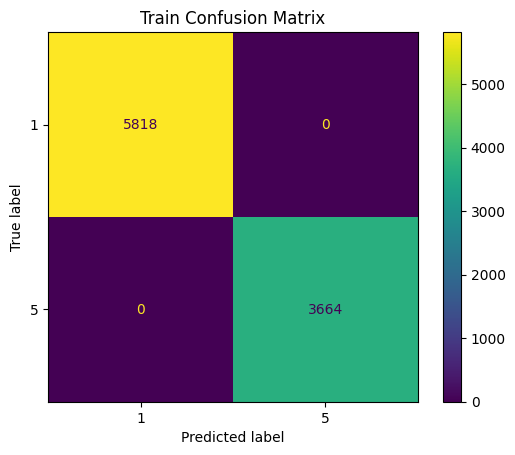

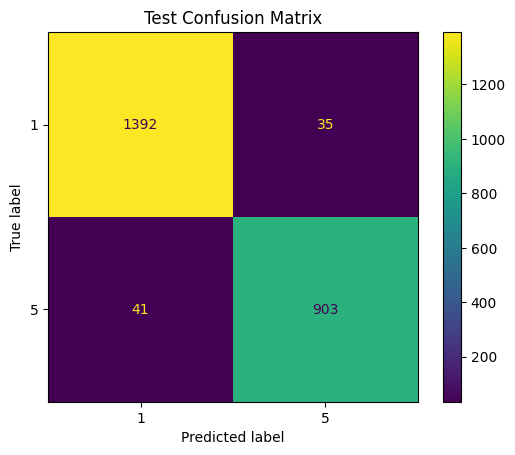

In [34]:
import matplotlib.pyplot as plt

y_pred_test=estimator.predict(X_test_trf2)
test_confusion_matrix=metrics.confusion_matrix(y_test2,y_pred_test)
test_cm_plot=metrics.ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix,display_labels=estimator.classes_)

y_pred_train=estimator.predict(X_train_trf2)
train_confusion_matrix=metrics.confusion_matrix(y_train2,y_pred_train)
train_cm_plot=metrics.ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix,display_labels=estimator.classes_)

train_cm_plot.plot()
plt.title('Train Confusion Matrix')

test_cm_plot.plot()
plt.title('Test Confusion Matrix')

plt.show()

From the confusion matrix, we observe that the model has higher Type II error than Type I error where there is a higher number of false positives than false negatives for the test data. In addition, the count of true negative is much lower than the true positive.

From the test set, take a look at the two false positives with highest predicted probabilities and the two false negatives with the loweest predicted probabilities. Why do you think the model predict them as positive/negative? (4 points)

In [52]:
# Get predicted probabilities
y_pred_prob = estimator.predict_proba(X_test_trf2)[:, 1]

# Identify false positives and false negatives
fp = (y_pred_test == 5) & (y_test2 == 1)
fn = (y_pred_test == 1) & (y_test2 == 5)

# Get predicted probabilities for false positives and false negatives
fp_prob = y_pred_prob[fp]
fn_prob = y_pred_prob[fn]

# Checking if the shapes are correct
# print(fp_prob.shape)
# print(fn_prob.shape)

# Sort false positives by predicted probabilities in ascending order
sorted_fp_index = np.argsort(fp_prob)

# Sort false negatives by predicted probabilities in descending order
sorted_fn_index = np.argsort(fn_prob)[::-1]

# Get the two false positives with the highest predicted probabilities
highest_fp = fp_prob[sorted_fp_index][:2]

# Get the two false negatives with the lowest predicted probabilities
lowest_fn = fn_prob[sorted_fn_index][:2]

pd.set_option('display.max_colwidth', None)

# Get the two false positives with the highest predicted probabilities
highest_fp_index = np.where(fp)[0][sorted_fp_index][:2]

# Get the two false negatives with the lowest predicted probabilities
lowest_fn_index = np.where(fn)[0][sorted_fn_index][:2]

top2fn_fp=pd.DataFrame({'False Positive':X_test2.iloc[highest_fp_index].values,'False Negative':X_test2.iloc[lowest_fn_index].values})
top2fn_fp

# From the results obtained, we observe positive words in the false positive texts such as 'recommend' and 'good', whereas the false negatives has 
# negative words such as 'disappointing' and 'disregard'. The presence of such words when not put into context could result in the model quantifying wrong prediction probability.

,False Positive,False Negative
0,"I have used Maynard in the past. They did a decent job installing my new HVAC and new vent system. I even purchased a home health plan hoping to protect my house moving forward.\n\nA plumbing issue came up at my house, so as part of my home health plan benefit, I thought I'd reach out to Maynard first to diagnose and provide an appropriate solution to plumbing problems I was having.\n\nI had a service tech dispatched to my house, which I paid roughly $50 (a ""discount"" for purchasing a home health plan) for a diagnosis. Tech arrived, asked me some questions and crawled around in the crawl space--took all of 15 - 20 minutes. Then he presented me with the long list of problems such as a collapsed main sewer line, improper venting, improper connections to the main, etc., and the long list of fixes that would be needed. He then spent about 10 minutes writing up a quote for me, which came to a little over $13,000. Perhaps that was a fair number and Maynard would have done quality work IF that was the proper diagnosis and solution.\n\nI decided to get a second opinion, and thankfully, I did. The second plumber came out and did a proper inspection -- asked questions, observed inside the house, crawled under the house AND ran a camera through the pipes of my house, especially the main sewer line. Turns out the main line was completely fine except for a clog, which took no time at all to clear. There was one section underneath one of the showers that was severely clogged, so it was replaced. The plumber did a few other small PVC updates and installed a more easily accessible clean out to make troubleshooting easier in the future. I ended up spending less than $2,900.\n\nI called the service technician to follow up and let him know my disappointment in his poor assessment -- either lazy or just plain dishonest. When I informed him about properly inspecting the problem with a camera, he told me, ""I tried to get one for you, but I didn't have one on my truck,"" which is a simply unacceptable excuse. 1. Why did I pay you $50 in addition to my ""home health plan"" for you to diagnose the plumbing problem if you are are not going to use the right equipment or put forth the level of effort required? 2. If you have the audacity to quote me more than $13,000 for a job then you damn well better go back to you main headquarters, get a plumbing camera and come back to my house to run a proper diagnosis.\n\nIn summary, Maynard is either lazy, dishonest or a little bit of both. When they come out, they are NOT looking to diagnose the problem and offer you options that are truly tailored to fix the problem you have. Maynard is there to make the most money off of you plain and simple. Would Maynard's proposed solution have fixed my problem? Sure. But it would have cost me $13,000 and been way above and beyond what was necessary. They tried to sell me a brand new Cadillac when all I need was an oil change, new air filter and swap out the tires. I saved more than $10,000 by NOT using Maynard and instead going with a company that works hard and is honest. I'd recommend you find someone else as well.","I went to Screwbox based on reviews and word of mouth. I was not disappointed. Steve's stellar reputation precedes him. \n\nI have a mid 2012 MacBook Pro that's been acting slow and sluggish lately. Assuming it was old and I just had a lot of junk on it so I didn't give it much thought. \n\nOn Saturday (09/12/2015), I was trying to work from home and the slowness of the computer was seriously annoying me. I went into Disk Utility and tried to figure out what was going on. I got an error that something was wrong with my hard drive. I called Screwbox without even checking their hours of operation only to realize they were closed. About an hour later I got a text from the same number. ""Screwbox will be open from 3-7 today. Is there something I can help you with? -Steve"" After giving a description of my issue, Steve asked i

Build 6 L2 regularized logistic regression models with C in [0.001, 0.01, 0.1, 1, 10, 100] and create a table with the below schema. Think about what is model complexity here. Comment on the observations.(4 points)

| C  | Train AUC | Model Complexity | Test AUC |
|--------|---------------|------------------|-----------|
| 0.001 |               |                  |           |
| 0.01  |               |                  |           |
| 0.1   |               |                  |           |
| 1    |               |                  |           |
| 10    |               |                  |           |
| 100   |               |                  |           |

In [54]:
from sklearn.metrics import roc_auc_score

logr_dict={"C":[],"Train AUC":[],"Model Complexity":[],"Test AUC":[]}
fpr_l2 = []
tpr_l2 = []
C = [0.001, 0.01, 0.1, 1, 10, 100]
for c in C:
    estimator_l2 = linear_model.LogisticRegression(penalty='l2', C=c, max_iter=1000, random_state=2024)
    estimator_l2.fit(X_train_trf2, y_train2)
    fpr , tpr, thresholds = metrics.roc_curve(y_test2, estimator_l2.predict_proba(X_test_trf2)[:,1], pos_label=5)
    fpr_l2.append(list(fpr))
    tpr_l2.append(list(tpr))
    logr_dict["C"].append(c)
    logr_dict['Train AUC'].append(roc_auc_score(y_train2,estimator_l2.predict_proba(X_train_trf2)[:,1]))
    logr_dict['Model Complexity'].append(np.sqrt(np.square(estimator_l2.coef_[0][0]) + np.square(estimator_l2.coef_[0][1])))
    logr_dict['Test AUC'].append(roc_auc_score(y_test2,estimator_l2.predict_proba(X_test_trf2)[:,1]))

logr_table=pd.DataFrame(logr_dict)

In [55]:
logr_table

,C,Train AUC,Model Complexity,Test AUC
0,0.001,0.994526,0.022769,0.987828
1,0.010,0.999951,0.048625,0.993981
2,0.100,1.000000,0.078301,0.995255
3,1.000,1.000000,0.104547,0.995541
4,10.000,1.000000,0.206407,0.995100
5,100.000,1.000000,0.347695,0.993669


The model complexity, train and test AUC increases with increasing C values. When C=1, however, the test AUC started to decrease, indicating a overfitted model. 

Plot the ROC curves for the six models you have built above. Which model has the best performance? (4 points)

An example ROC plot is showed below.

<img src="https://i.stack.imgur.com/SFA9h.png" width="500"/>

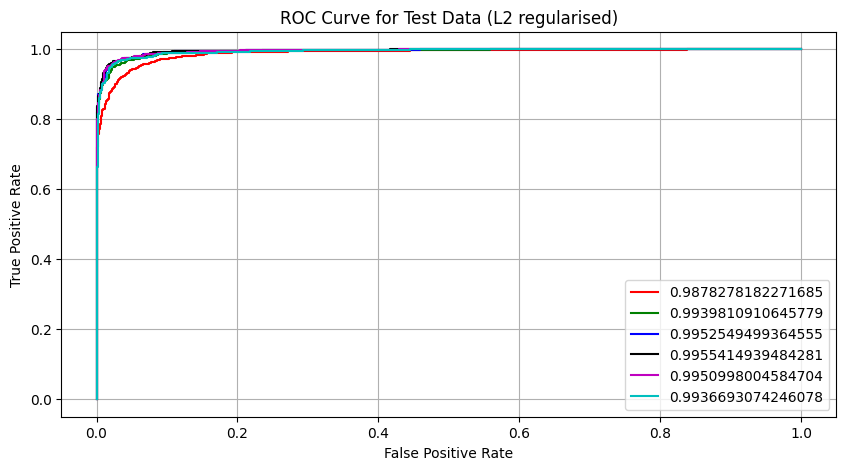

In [56]:
colours=['r','g','b','k','m','c']
plt.figure(figsize=(10,5))
for i in range(len(fpr_l2)):
    plt.plot(fpr_l2[i],tpr_l2[i],colours[i],label='C='+str(C[i]))
plt.gca().legend(logr_table['Test AUC'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data (L2 regularised)')
plt.grid(True)
plt.show()

Based on the ROC curve, the model with C=1 showed the best performance.

List the 10 most important features based on the magnitude of the coefficients of the best performing model. Do the top features make sense? (3 points)

In [138]:
l2_estimator_top10 = linear_model.LogisticRegression(penalty='l2', C=0.01, max_iter=1000, random_state=2024)
l2_estimator_top10.fit(X_train_trf2, y_train2)

logr_l2_top10=pd.DataFrame({'Feature':vectorizer.get_feature_names_out(),'Coefficient':l2_estimator_top10.coef_.tolist()[0]})
logr_l2_top10['Absolute coefficient'] = abs(logr_l2_top10['Coefficient'])
logr_l2_top10.sort_values('Absolute coefficient',ascending=False).head(10)

,Feature,Coefficient,Absolute coefficient
33661,love,0.252559,0.252559
2586,amazing,0.247432,0.247432
24124,great,0.226083,0.226083
15469,delicious,0.225217,0.225217
38081,no,-0.212797,0.212797
43859,perfect,0.210853,0.210853
25208,happy,0.207862,0.207862
38411,not,-0.206944,0.206944
62555,told,-0.198599,0.198599
2404,always,0.190122,0.190122


In [139]:
print(metrics.accuracy_score(y_test2,l2_estimator_top10.predict(X_test_trf2)))

0.9654154365246731


Some of the top features like no, not and told do not make sense as it is not a descriptive word.

Build 6 L1 regularized logistic regression models with C in [0.001, 0.01, 0.1, 1, 10, 100] and create a table with the below schema. Think about what is model complexity here. Comment on the observations.(4 points)

| C  | Train AUC | Model Complexity | Test AUC |
|--------|---------------|------------------|-----------|
| 0.001 |               |                  |           |
| 0.01  |               |                  |           |
| 0.1   |               |                  |           |
| 1    |               |                  |           |
| 10    |               |                  |           |
| 100   |               |                  |           |

In [60]:
logr_l1_dict={"C":[],"Train AUC":[],"Model Complexity":[],"Test AUC":[]}
fpr_l1 = []
tpr_l1 = []
C = [0.001, 0.01, 0.1, 1, 10, 100]
for c in C:
    estimator = linear_model.LogisticRegression(penalty='l1', solver='liblinear', C=c, max_iter=1000, random_state=2024)
    estimator.fit(X_train_trf2, y_train2)
    fpr , tpr, thresholds = metrics.roc_curve(y_test2, estimator.predict_proba(X_test_trf2)[:,1], pos_label=5)
    fpr_l1.append(list(fpr))
    tpr_l1.append(list(tpr))
    logr_l1_dict["C"].append(c)
    logr_l1_dict['Train AUC'].append(roc_auc_score(y_train2,estimator.predict_proba(X_train_trf2)[:,1]))
    logr_l1_dict['Model Complexity'].append(np.sqrt(np.sum(estimator.coef_**2)))
    logr_l1_dict['Test AUC'].append(roc_auc_score(y_test2,estimator.predict_proba(X_test_trf2)[:,1]))

logr_l1_table=pd.DataFrame(logr_l1_dict)

In [98]:
logr_l1_table

,C,Train AUC,Model Complexity,Test AUC
0,0.001,0.917329,0.308531,0.904179
1,0.010,0.978063,1.254331,0.973371
2,0.100,0.997353,3.559588,0.991980
3,1.000,1.000000,10.060043,0.993634
4,10.000,1.000000,16.109780,0.994278
5,100.000,1.000000,19.129293,0.995749


Plot the ROC curves for the six models you have built. Which model has the best performance? (4 points)

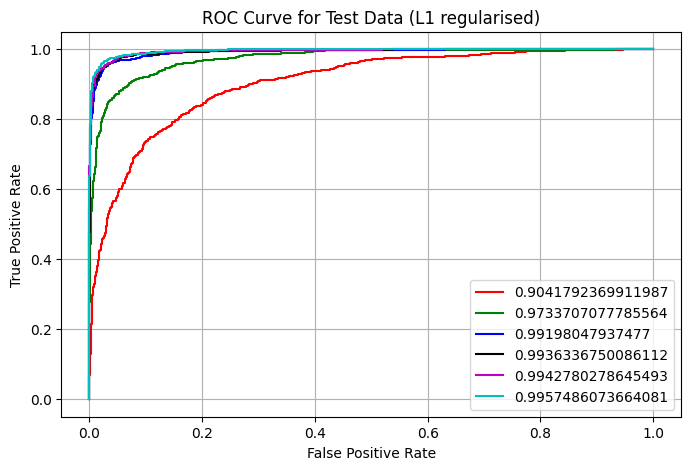

In [63]:
colours=['r','g','b','k','m','c']
plt.figure(figsize=(8,5))
for i in range(len(fpr_l1)):
    plt.plot(fpr_l1[i],tpr_l1[i],colours[i],label='C='+str(C[i]))
plt.gca().legend(logr_l1_table['Test AUC'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data (L1 regularised)')
plt.grid(True)
plt.show()

Based on the ROC curve, the model with C=100 appeared to perform best.

List the 10 most important features based on the magnitude of the coefficients of the best performing model. Do the top features make sense? (3 points)

In [107]:
estimator_top10 = linear_model.LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=1000, random_state=2024)
estimator_top10.fit(X_train_trf2, y_train2)

logr_l1_top10=pd.DataFrame({'Feature':vectorizer.get_feature_names_out(),'Coefficient':estimator_top10.coef_.tolist()[0]})
logr_l1_top10['Absolute coefficient'] = abs(logr_l1_top10['Coefficient'])
logr_l1_top10.sort_values('Absolute coefficient',ascending=False).head(10)

,Feature,Coefficient,Absolute coefficient
70323,worst,-0.769817,0.769817
43859,perfect,0.723325,0.723325
15469,delicious,0.675294,0.675294
34201,management,-0.652469,0.652469
2586,amazing,0.610239,0.610239
7018,awesome,0.553160,0.553160
19379,excellent,0.544292,0.544292
28275,impressed,0.542984,0.542984
33661,love,0.518183,0.518183
55513,terrible,-0.506560,0.506560


In [109]:
print(metrics.accuracy_score(y_test2,estimator_top10.predict(X_test_trf2)))

0.9628848587094053


Concluding section: Compared to the linear regression model, the logistic regression performed better as the run time was significantly shorter and the top features made sense too. In terms of features, the L1 regularized model produced seemingly better features than the L2 regularized model as the features made more sense. However, the accuracy score for the L2 regularized model was higher than the L1 regularized model.

## Task 4: Naive Bayes Classifier (11 points)

In this task, you are to build a Naive Bayes model to predict the stars based on the text feature. You should reuse the previous train and test datasets and vectorized features. Use the default parameters for the MultinomiaNB model.


Generate the confusion matrices on both train and test sets. What do you observe? (3 points)

In [128]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train_trf2,y_train2)

# Confusion matrix for test data
metrics.confusion_matrix(y_test2,mnb.predict(X_test_trf2))

array([[1322,  105],
       [ 143,  801]], dtype=int64)

In [129]:
# Confusion matrix for train data
metrics.confusion_matrix(y_train2,mnb.predict(X_train_trf2))

array([[5372,  446],
       [ 405, 3259]], dtype=int64)

From the confusion matrix, there is a higher count of false positives than false negatives in the train data whereas there is a higher count of false negatives in the test data than false positives.
Howerver, in both datasets, the true positive count seems to always be higher than the true negative.

Calculate which 10 tokens are the most predictive of **5-star reviews**, and which 10 tokens are the most predictive of **1-star reviews**. (4 points)

Hint
1. Naive Bayes automatically counts the number of times each token appears in each class, as well as the number of observations in each class. You can access these counts via the `feature_count_` and `class_count_` attributes of the Naive Bayes model object.
2. Define a metric to indicate the predictiveness of a token for 5/1 star reviews.

In [130]:
mnb.feature_count_.shape

(2, 71527)

In [134]:
onestar_token=mnb.feature_count_[0,:]
fivestar_token=mnb.feature_count_[1,:]

tokens_df=pd.DataFrame({'Token':vectorizer.get_feature_names_out(),'1 star':onestar_token,'5 star':fivestar_token}).set_index('Token')

# both one star and five star to start at 1 to avoid nan values
tokens_df['1 star']+=1
tokens_df['5 star']+=1

# to calculate the frequency tokens in each class
tokens_df['1 star'] = tokens_df['1 star']/mnb.class_count_[0]
tokens_df['5 star'] = tokens_df['5 star']/mnb.class_count_[1]

# metric to indicate predictiveness of a token for 5/1 star review: ratio of 5 star frequency to 1 star frequency
# a higher ratio indicates a token is more predictive of a 5 star review
tokens_df['5 star ratio'] = tokens_df['5 star']/tokens_df['1 star']

print('10 tokens which are predictive of 5 stars reviews')
tokens_df.sort_values('5 star ratio',ascending=False).head(10)

10 tokens which are predictive of 5 stars reviews


,1 star,5 star,5 star ratio
Token,,,
zahav,0.000172,0.024836,144.497271
delectable,0.000172,0.022380,130.206332
not disappoint,0.000172,0.021015,122.266921
new favorite,0.000172,0.017467,101.624454
melted in,0.000172,0.017467,101.624454
braised,0.000344,0.032478,94.478985
so tender,0.000172,0.015557,90.509279
perfect amount,0.000172,0.014738,85.745633
perfectly with,0.000172,0.014738,85.745633


In [133]:
print('10 tokens which are predictive of 1 star reviews')
tokens_df.sort_values('5 star ratio',ascending=True).head(10)

10 tokens which are predictive of 1 star reviews


,1 star,5 star,5 star ratio
Token,,,
unprofessional,0.106394,0.001092,0.010261
called again,0.024063,0.000273,0.011342
rudely,0.035923,0.000546,0.015195
incompetence,0.017876,0.000273,0.015268
to refund,0.017876,0.000273,0.015268
no response,0.034032,0.000546,0.016039
unethical,0.016329,0.000273,0.016715
worst experience,0.029220,0.000546,0.018681
furious,0.014266,0.000273,0.019131


Comment on the top tokens of 5-star and 1 star reviews. Do these tokens make sense? (4 points)

The top tokens for both review types made sense as it is reflective of the type of words one would expect to be found in those review types and there are less ambiguous. As bigrams are used, the model might be able to better capture the positive/negative connotation of the description. For example, with a unigram, only "disappoint" was captured instead of "not disappoint". The presence of "not" would make a difference in predicting the probability of the review. However, this multinomialNB model also picked up words such as "called again" and "zahav" which did not make sense. 

## Task 5: Build a better classifier (30 points)
In this task, you are to build a better classifier to predict the stars based on the text feature. You will need to join a [Kaggle Competition](https://www.kaggle.com/t/dba51cc9794640a08f89949cf98e9375). Please follow the following instructions:
1. Please use your student ID as the user name when setting up the Kaggle account
2. Please only use the dataset from this competition: [Kaggle Competition](https://www.kaggle.com/t/dba51cc9794640a08f89949cf98e9375).
3. Please follow the `sample_submissions.csv` for the submission format.
4. Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.
5. You may only use Logistic Regression and Naiive Bayes.
6. In order to improve the performance, you may want to explore new ways for feature generation and regularization, etc. 

Grading Policy: 
- If you are able to beat the benchmark submission on the private leaderboard, you will get 15 points.
- The other 15 points are based on your final ranking on the **private leaderboard**: If there are $n$ participants and you rank $k$th position, your score for this part will be computed using the below function, where $n$ is the total number of participants and $k$ is the ranking on the private leaderboard.
  
  ```
    def map_to_range(n, k):
        # Calculate slope for linear mapping y = m*x + c
        m = -15 / (n - 1)
        c = 15 - m

        # Calculate value for k and round up 
        mapped_k = round(m * k + c)

        return mapped_k
  ```

In [17]:
def map_to_range(n, k):
        # Calculate slope for linear mapping y = m*x + c
        m = -15 / (n - 1)
        c = 15 - m

        # Calculate value for k and round up 
        mapped_k = round(m * k + c)

        return mapped_k
    
f'If there are 80 participants and you rank 10th in the competition, then you will get {map_to_range(80, 10)} points'


'If there are 80 participants and you rank 10th in the competition, then you will get 13 points'

In [1]:
# Importing libraries
import nltk
import pandas as pd
import numpy as np
import re, string
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_auc_score, roc_curve, auc
from textblob import TextBlob

# Import data
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

x=train['text']
y=train['label']

In [2]:
# Setting stopwords
stop_words = set(stopwords.words("english"))
stop_words.remove('not')

In [85]:
import contractions

# Preprocess data by removing non words, punctuation, numbers, stopwords and lemmatizing 
def preprocess(text):
    text = text.lower()
    text=re.compile(r'<.*?>').sub(r'', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub(r'\d',' ',text)
    text =  contractions.fix(text)
    filtered_text = ' '.join(word for word in text.split() if word not in stop_words)
    filtered_text = ''.join(str(TextBlob(x).correct()) for x in filtered_text)
    tokens = word_tokenize(filtered_text)
    wnl = WordNetLemmatizer()
    lem_tokens = ' '.join(wnl.lemmatize(word) for word in tokens)
    return lem_tokens

# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=2024)
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)   

We tested out two vectorizing method: CountVectorizer and TfidfVectorizer

In [74]:
# Test 1: Using count vectorizer to transform text data
vectorizer = CountVectorizer(ngram_range=(1,2),analyzer='word',max_df=0.5, min_df=5)
X_train_cvect=vectorizer.fit_transform(X_train)
X_test_cvect=vectorizer.transform(X_test)

In [131]:
# Test 2: Using tfidf vectorizer to transform text data
tfidf = TfidfVectorizer(ngram_range = (1,2),max_df=0.5,min_df=5, sublinear_tf=True,analyzer='word')
X_train_vect=tfidf.fit_transform(X_train)
X_test_vect=tfidf.transform(X_test)
tfidf.get_feature_names_out()

array(['ability', 'able', 'able buy', ..., 'zuke product', 'zuke treat',
       'zukes'], dtype=object)

Testing different feature selection methods

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=20000)
selector.fit(X_train_vect, y_train)
X_train_vect = selector.transform(X_train_vect)
X_test_vect = selector.transform(X_test_vect)

c:\Users\liu_y\anaconda3\envs\CS610-env\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=20000 is greater than n_features=10000. All the features will be returned.
  warnings.warn(


In [132]:
from sklearn.feature_selection import chi2, SelectKBest
kbest = SelectKBest(score_func = chi2, k=20000)
kbest.fit(X_train_vect, y_train)
X_train_vect = kbest.transform(X_train_vect)
X_test_vect = kbest.transform(X_test_vect)

In [135]:
# Logistic Regression: Testing different C values
logr_1={"C":[],"Train AUC":[],"Model Complexity":[],"Test AUC":[]}
fpr_1 = []
tpr_1 = []
C = [0.001, 0.01, 0.1, 1, 10, 100]
for c in C:
    clf = linear_model.LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(X_train_vect,y_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test_vect)[:,1])
    fpr_1.append(list(fpr))
    tpr_1.append(list(tpr))
    logr_1["C"].append(c)
    logr_1['Train AUC'].append(roc_auc_score(y_train,clf.predict_proba(X_train_vect)[:,1]))
    logr_1['Model Complexity'].append(np.sqrt(np.square(clf.coef_[0][0]) + np.square(clf.coef_[0][1])))
    logr_1['Test AUC'].append(roc_auc_score(y_test,clf.predict_proba(X_test_vect)[:,1]))

logr_table=pd.DataFrame(logr_1)
logr_table

,C,Train AUC,Model Complexity,Test AUC
0,0.001,0.934065,0.008762,0.921042
1,0.010,0.961160,0.048094,0.947484
2,0.100,0.967541,0.355567,0.953084
3,1.000,0.988420,1.435550,0.971158
4,10.000,0.999484,3.647754,0.979277
5,100.000,1.000000,7.686868,0.979120


In [119]:
# Train Logistic Regression model
clf = linear_model.LogisticRegression(penalty='l2',C=10, solver='liblinear')
clf.fit(X_train_vect, y_train)

LogisticRegression(C=10, solver='liblinear')

In [128]:
# Analyse top 10 data
top10=pd.DataFrame({'Feature':kbest.get_support(),'Coefficient':kbest.scores_})
top10['Absolute coefficient'] = abs(top10['Coefficient'])
top10.sort_values('Absolute coefficient',ascending=False).head(25)

,Feature,Coefficient,Absolute coefficient
30395,True,144.050235,144.050235
30394,True,114.294194,114.294194
13578,True,111.334118,111.334118
23446,True,108.021156,108.021156
18744,True,91.088618,91.088618
31271,True,88.843445,88.843445
1580,True,87.137482,87.137482
17772,True,79.173656,79.173656
28336,True,73.484913,73.484913
27946,True,73.457488,73.457488


In [129]:
# Calculate AUC
print(roc_auc_score(y_train,clf.predict_proba(X_train_vect)[:,1]))
print(roc_auc_score(y_test,clf.predict_proba(X_test_vect)[:,1]))

0.9994929421577965
0.9796876443359437


In [140]:
# Train MultinomialNB model
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=0.1)
mnb.fit(X_train_vect,y_train)
print(metrics.confusion_matrix(y_test,mnb.predict(X_test_vect)))
print(roc_auc_score(y_train,mnb.predict_proba(X_train_vect)[:,1]))
print(roc_auc_score(y_test,mnb.predict_proba(X_test_vect)[:,1]))

[[ 353  381]
 [  20 5083]]
0.9962449176685817
0.9680625437513115


In [81]:
# Getting features for multinomialNB model
token0=mnb.feature_count_[0,:]
token1=mnb.feature_count_[1,:]

tokens_df=pd.DataFrame({'Token':tfidf.get_feature_names_out(),'0':token0,'1':token1}).set_index('Token')

tokens_df['0']+=1
tokens_df['1']+=1

tokens_df['Ratio'] = tokens_df['1']/tokens_df['0']

tokens_df.sort_values('Ratio',ascending=False).head(20)

,0,1,Ratio
Token,,,
magnesium,1.0,191.0,191.000000
love stuff,1.0,170.0,170.000000
highly recommend,5.0,742.0,148.400000
highly recommended,2.0,251.0,125.500000
also great,1.0,110.0,110.000000
pleasantly surprised,1.0,107.0,107.000000
workout,1.0,105.0,105.000000
would highly,1.0,105.0,105.000000
absolutely delicious,1.0,100.0,100.000000


To determine the optimal hyperparameters, we used gridsearch to test the different parameter and their values.

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('kbest', SelectKBest(score_func=chi2)),
    # ('lr', linear_model.LogisticRegression())
    ('clf', MultinomialNB(
        fit_prior=True, class_prior=None))
])
parameters = {
    'tfidf__max_df': (0.1, 0.2, 0.3, 0.4, 0.5),
    'tfidf__min_df': (5, 10, 20),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'kbest__k': (10000, 20000, 30000),
    # 'lr__penalty': ('l1', 'l2'),
    # 'lr__C': (1e-2, 1e-3)
    # 'clf__estimator__alpha': (1e-2, 1e-3)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, scoring='roc_auc', n_jobs=2, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 2 folds for each of 135 candidates, totalling 270 fits
Best parameters set:
[('tfidf', TfidfVectorizer(max_df=0.4, min_df=20, ngram_range=(1, 2))), ('kbest', SelectKBest(k=10000, score_func=<function chi2 at 0x000001D65F577A60>)), ('clf', MultinomialNB())]


c:\Users\liu_y\anaconda3\envs\CS610-env\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10000 is greater than n_features=6516. All the features will be returned.
  warnings.warn(


In [7]:
tfidf = TfidfVectorizer(ngram_range = (1,2),sublinear_tf=True, max_df=0.2, min_df=210)
X_train_vect=tfidf.fit_transform(X_train)
X_test_vect=tfidf.transform(X_test)

kbest = SelectKBest(score_func = chi2, k=min(20000, X_train_vect.shape[1]))
kbest.fit(X_train_vect, y_train)
X_train_vect = kbest.transform(X_train_vect)
X_test_vect = kbest.transform(X_test_vect)

# Train a classification model
clf = linear_model.LogisticRegression(penalty='l2',C=0.01, solver='liblinear')
clf.fit(X_train_vect, y_train)

print(roc_auc_score(y_train,clf.predict_proba(X_train_vect)[:,1]))
print(roc_auc_score(y_test,clf.predict_proba(X_test_vect)[:,1]))

0.9534058672300941
0.9445007771781411


In [140]:
# Model 1
tfidf = TfidfVectorizer(ngram_range = (1,3),sublinear_tf=True, max_df=0.5, min_df=5)
X_train_vect=tfidf.fit_transform(X_train)
X_test_vect=tfidf.transform(X_test)
tfidf.get_feature_names_out()

# Train a classification model
clf = linear_model.LogisticRegression(penalty='l2',C=10, solver='liblinear')
clf.fit(X_train_vect, y_train)

print(roc_auc_score(y_train,clf.predict_proba(X_train_vect)[:,1]))
print(roc_auc_score(y_test,clf.predict_proba(X_test_vect)[:,1]))

0.9999514601251056
0.9782785250541837


In [341]:
# Model 2
tfidf = TfidfVectorizer(ngram_range = (1,3),sublinear_tf=True, max_df=0.5, min_df=5)
X_train_vect=tfidf.fit_transform(X_train)
X_test_vect=tfidf.transform(X_test)
tfidf.get_feature_names_out()

# Train a classification model
clf = linear_model.LogisticRegression(penalty='l2',C=1, solver='liblinear')
clf.fit(X_train_vect, y_train)

print(roc_auc_score(y_train,clf.predict_proba(X_train_vect)[:,1]))
print(roc_auc_score(y_test,clf.predict_proba(X_test_vect)[:,1]))

0.9915753850617403
0.9720053011505227


In [4]:
import scipy
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

ImportError: cannot import name 'triu' from 'scipy.linalg.special_matrices' (c:\Users\liu_y\anaconda3\envs\CS610-env\Lib\site-packages\scipy\linalg\special_matrices.py)

In [14]:
# Model 3 (Best Model)
tfidf = TfidfVectorizer(ngram_range = (1,2),sublinear_tf=True, max_df=0.5, min_df=5)
X_train_vect=tfidf.fit_transform(X_train)
X_test_vect=tfidf.transform(X_test)

kbest = SelectKBest(score_func = chi2, k=min(20000, X_train_vect.shape[1]))
kbest.fit(X_train_vect, y_train)
X_train_vect = kbest.transform(X_train_vect)
X_test_vect = kbest.transform(X_test_vect)

# Train a classification model
clf = linear_model.LogisticRegression(penalty='l2',C=10, solver='liblinear')
clf.fit(X_train_vect, y_train)

print(roc_auc_score(y_train,clf.predict_proba(X_train_vect)[:,1]))
print(roc_auc_score(y_test,clf.predict_proba(X_test_vect)[:,1]))

0.9994958300368977
0.9793202801579025


In [28]:
# Model 4
tfidf = TfidfVectorizer(ngram_range = (1,2),sublinear_tf=True, max_df=0.3, min_df=5)
X_train_vect=tfidf.fit_transform(X_train)
X_test_vect=tfidf.transform(X_test)

kbest = SelectKBest(score_func = f_classif, k=20000)
kbest.fit(X_train_vect, y_train)
X_train_vect = kbest.transform(X_train_vect)
X_test_vect = kbest.transform(X_test_vect)

# Train a classification model
clf = linear_model.LogisticRegression(penalty='l2',C=10, solver='liblinear')
clf.fit(X_train_vect, y_train)

print(roc_auc_score(y_train,clf.predict_proba(X_train_vect)[:,1]))
print(roc_auc_score(y_test,clf.predict_proba(X_test_vect)[:,1]))

0.9995474089008465
0.9796291757640028


In [22]:
# Predict on test data
sub = pd.DataFrame()
sub['ID'] = test['ID']

test_text = test['text'].apply(preprocess)
test_text = tfidf.transform(test_text)
sub['predicted'] = clf.predict_proba(kbest.transform(test_text))[:, 1]

In [377]:
sub.head(10)

,ID,predicted
0,0,0.999213
1,1,0.684976
2,2,0.997847
3,3,0.973571
4,4,0.194091
5,5,0.912826
6,6,0.997098
7,7,0.983752
8,8,0.998656
9,9,0.997625


In [23]:
sub.to_csv('submission7_01496485.csv',index=False)